## autor: Felipe Marcelo
### data: 12/08/2020
# Regressão Linear Simples

Nesse notebook usaremos a biblioteca Scikit-Learn para implementar um modelo de regressão linear simples para inferir os valores de emissão de gá carbônico de veículos.

In [1]:
# importando pacotes necessários
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
# baixando o dataset
!wget -O fuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-08-12 15:58:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘fuelConsumption.csv’

fuelConsumption.csv 100%[===================>]  70,93K   126KB/s    in 0,6s    

2020-08-12 15:58:53 (126 KB/s) - ‘fuelConsumption.csv’ saved [72629/72629]



In [2]:
# lendo o dataset 
df = pd.read_csv("fuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# descrevendo os dados estatisticamente
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# vamos selecionar algumas colunas para explorar mais detalhadamente
df_carecteristicas = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df_carecteristicas.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


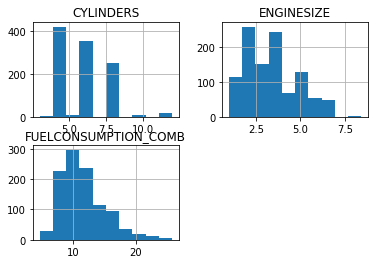

In [5]:
# vamos analisar essas caracteristicas visualmente
vis = df_carecteristicas[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
vis.hist()
plt.show()

Agora, vamos plotar cad uma dessas caracteristicas vs emissão de CO2, para ver se existe
alguma relação linear.

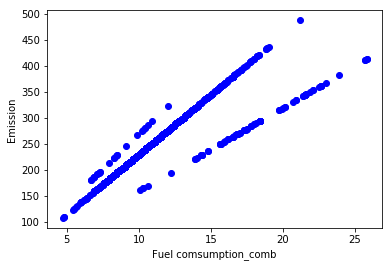

In [6]:
# plotando correlação entre consumo de combustivel e emissão de CO2
plt.scatter(df_carecteristicas.FUELCONSUMPTION_COMB, df_carecteristicas.CO2EMISSIONS, color = 'blue')
plt.xlabel("Fuel comsumption_comb")
plt.ylabel("Emission")
plt.show()

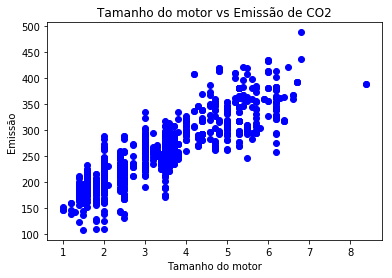

In [7]:
# plotando correlação entre tamanho do motor e emissão de CO2
plt.scatter(df_carecteristicas.ENGINESIZE, df_carecteristicas.CO2EMISSIONS, color = 'blue')
plt.xlabel("Tamanho do motor")
plt.ylabel("Emissão")
plt.title("Tamanho do motor vs Emissão de CO2")
plt.show()

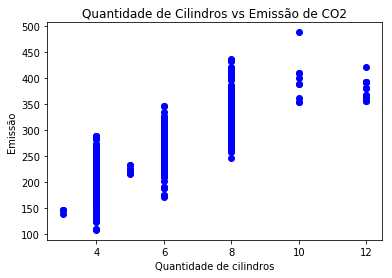

In [8]:
# plotando correlação entre quantidade de cilindros e emissaõ de CO2
plt.scatter(df_carecteristicas.CYLINDERS, df_carecteristicas.CO2EMISSIONS, color = "blue")
plt.title("Quantidade de Cilindros vs Emissão de CO2")
plt.xlabel("Quantidade de cilindros")
plt.ylabel("Emissão")
plt.show()

## Dataset de treino e teste
Agora, que já exploramos a correlação entre as variaveis do nosso dataset, vamos criar um dataset de treino e um datasset de teste. Para isso, iremos dividir nosso dataset original em um dataset de treino e teste, respectivamente. Lembre-se que esses são mutuamente exclusivos, ou seja, não usaremos os dados de treinamento para testar o modelo. Isso é muito importante, pois irá providenciar uma maior acuracia para a avaliação do nosso modelo.

Vamos dividir nossos dados da seguintte forma: 80% dos dados serão usados para treinamento e 20% para teste. Para dividi-los aleatoriamente, utilizaremos do método np.random.rand(). Chamaremos esses valores aleatorios do df de mascara. Veja como a seguir:

In [10]:
# criando posições aleatorias do df com tamanho de 0.8 do seu tamanho original
mascara = np.random.rand(len(df)) < 0.8
# selecioando .8 do df
treino = df_carecteristicas[mascara]
# selecioando .2 do df com o metodo ~
teste = df_carecteristicas[~mascara]

## Modelo de Regressão Linear Simples

A regressão linear modela um modelo linear com os coeficientes B = (B1, ..., Bn) que irão minimizar o erro residual da soma dos quadrados entre as caracteristicas independentes do df, e as caracteristicas dependentes por uma aproximação LINEAR. 

Vamos agora visualizar a distribuição dos dados de treinamento e de teste.

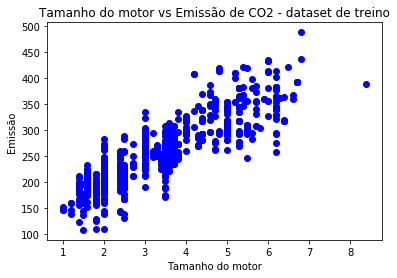

In [11]:
# visualizando a correlação do tamanho do motor e a emissão de CO2 no dataset de treino
plt.scatter(treino.ENGINESIZE, treino.CO2EMISSIONS, color = 'b')
plt.title("Tamanho do motor vs Emissão de CO2 - dataset de treino")
plt.xlabel("Tamanho do motor")
plt.ylabel("Emissão")
plt.show()

## Modelagem

Agora, vamos usar o pacote sklearn para modelar nossos dados.



In [12]:
# importando bibliotecas
from sklearn import linear_model

# criando objeto de Regressão Linear
objct_regr = linear_model.LinearRegression()

treino_x = np.asanyarray(treino[['ENGINESIZE']])
treino_y = np.asanyarray(treino[['CO2EMISSIONS']])

# modelando os dados
objct_regr.fit(treino_x, treino_y)

# printando os coeficientes da função f(x) = ax + b
print('Coeficiente: ', objct_regr.coef_)     # a
print('Intercept: ', objct_regr.intercept_)  # b

Coeficiente:  [[39.49110972]]
Intercept:  [124.57004571]


In [16]:
# b == corta eixo y
# a == taxa de crescimento 

Text(0, 0.5, 'Emissao')

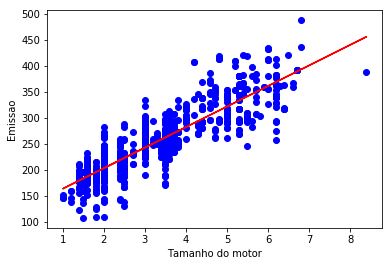

In [13]:
plt.scatter(treino.ENGINESIZE, treino.CO2EMISSIONS, color = 'b')
plt.plot(treino_x, objct_regr.coef_[0][0] * treino_x + objct_regr.intercept_[0], '-r')
plt.xlabel("Tamanho do motor")
plt.ylabel("Emissao")

In [14]:
# metricas de avaliação 
from sklearn.metrics import r2_score

test_x = np.asanyarray(teste[['ENGINESIZE']])
test_y = np.asanyarray(teste[['CO2EMISSIONS']])
test_y_ = objct_regr.predict(test_x)

print("Media dos erros absolutos: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Soma residual dos erros do quadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Media dos erros absolutos: 22.48
Soma residual dos erros do quadrados (MSE): 855.89
R2-score: 0.74
